In [1]:
# import packages
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
import numpy as np

In [6]:
alpha_k = 0.297
alpha_l = 0.650
delta = 0.154
psi = 1.080
w = 0.700
r = 0.040
sigma_z = 0.213
mu = 0.000
rho = 0.7605
sigma_eps = sigma_z * ((1 - rho ** 2) ** (1 / 2))
sizez = 9
betafirm = 1 / (1 + r)

In [7]:
# Compute cut-off values
z_cutoffs = (sigma_z * norm.ppf(np.arange(sizez + 1) / sizez)) + mu
print('Cut-off values = ', z_cutoffs)

Cut-off values =  [       -inf -0.25999639 -0.16288316 -0.09174491 -0.02975829  0.02975829
  0.09174491  0.16288316  0.25999639         inf]


In [8]:
# compute grid points for z
z_grid = ((sizez * sigma_z * (norm.pdf((z_cutoffs[:-1] - mu) / sigma_z)
                              - norm.pdf((z_cutoffs[1:] - mu) / sigma_z)))
              + mu)
print('Grid points = ', z_grid)

Grid points =  [-0.36307041 -0.20781458 -0.12613578 -0.0603241   0.          0.0603241
  0.12613578  0.20781458  0.36307041]


In [9]:
# define function that we will integrate
def integrand(x, sigma_z, sigma_eps, rho, mu, z_j, z_jp1):
    val = (np.exp((-1 * ((x - mu) ** 2)) / (2 * (sigma_z ** 2)))
            * (norm.cdf((z_jp1 - (mu * (1 - rho)) - (rho * x)) / sigma_eps)
               - norm.cdf((z_j - (mu * (1 - rho)) - (rho * x)) / sigma_eps)))
    
    return val

# compute transition probabilities
pi = np.empty((sizez, sizez))
for i in range(sizez):
    for j in range(sizez):
        results = integrate.quad(integrand, z_cutoffs[i], z_cutoffs[i + 1],
                                 args = (sigma_z, sigma_eps, rho, mu,
                                         z_cutoffs[j], z_cutoffs[j + 1]))
        pi[i,j] = (sizez / np.sqrt(2 * np.pi * sigma_z ** 2)) * results[0]
        
print('Transition matrix = ', pi)
print('pi sums = ', pi.sum(axis=0), pi.sum(axis=1))

Transition matrix =  [[  5.34646999e-01   2.33099908e-01   1.19241334e-01   6.16948412e-02
    3.06368282e-02   1.38694209e-02   5.27307457e-03   1.39972319e-03
    1.37871226e-04]
 [  2.33099908e-01   2.53066831e-01   1.95990939e-01   1.38221479e-01
    8.98690322e-02   5.26608516e-02   2.62024217e-02   9.48881413e-03
    1.39972319e-03]
 [  1.19241334e-01   1.95990939e-01   1.96744233e-01   1.70765394e-01
    1.33994761e-01   9.44950201e-02   5.72928238e-02   2.62024217e-02
    5.27307457e-03]
 [  6.16948412e-02   1.38221479e-01   1.70765394e-01   1.75481409e-01
    1.60693238e-01   1.32118347e-01   9.44950201e-02   5.26608516e-02
    1.38694209e-02]
 [  3.06368282e-02   8.98690322e-02   1.33994761e-01   1.60693238e-01
    1.69612281e-01   1.60693238e-01   1.33994761e-01   8.98690322e-02
    3.06368282e-02]
 [  1.38694209e-02   5.26608516e-02   9.44950201e-02   1.32118347e-01
    1.60693238e-01   1.75481409e-01   1.70765394e-01   1.38221479e-01
    6.16948412e-02]
 [  5.27307457e-03 

In [31]:
dens = 1
# put in bounds here for the capital stock space
kstar = (((alpha_k / (1 / betafirm - 1 + delta))**(1 - alpha_l)) * ((alpha_l / w) ** alpha_l)) ** (1 - alpha_k - alpha_l)
kbar = 2*kstar
lb_k = 0.001
ub_k = kbar
krat = np.log(lb_k / ub_k)
numb = np.ceil(krat / np.log(1 - delta))
K = np.zeros(int(numb * dens))
# we'll create in a way where we pin down the upper bound - since
# the distance will be small near the lower bound, we'll miss that by little
for j in range(int(numb * dens)):
    K[j] = ub_k * (1 - delta) ** (j / dens)
k_grid = K[::-1]
sizek = k_grid.shape[0]

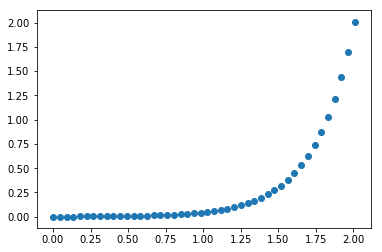

In [32]:
k_linear = np.linspace(lb_k, ub_k, num=sizek)
plt.scatter(k_linear, k_grid)
plt.show()

In [33]:
op_grid = np.empty((sizez, sizek))

for i in range(sizez):
    op_grid(1 - alpha_l) * ((alpha_l / w) ** (alpha_l / (1 - alpha_l))) * (z ** (1 / (1 - alpha_l))) * (k_grid ** (alpha_k / (1 - alpha_l)))

print(op)

## firm cash flow, e
#e = np.zeros((sizek, sizek, sizez))
#for i in range(sizek):
#    for j in range(sizek):
#        for k in range(sizez):
#            e[i, j, k] = (op[i] - k_grid[j] + ((1 - delta) * kvec[i]) -
#                       ((psi / 2) * ((kvec[j] - ((1 - delta) * kvec[i])) ** 2)
#                        / kvec[i]))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


ValueError: operands could not be broadcast together with shapes (9,) (46,) 